## Programming for Data Science

### **Project 1**
**Group members:**
* Ghita Rholi, 20221491@novaims.unl.pt
* Mariana Ferreira, 20211637@novaims.unl.pt
* Mariana Neto, 20211527@novaims.unl.pt

### Step 4. Feature discrimination

Assessment of individual features’ discrimination. The expected result of this step is to:
* Gain preliminary insights about the respondents
* Select prominent and non-redundant features for the next step

- **1.** Scaled mean deviation
- **2.** Spearman vs Pearson
    - **2.1** The six features with the highest correlation
    - **2.2** Verifying the Redundancy existent
- **3.** $\chi ^2$ test for independence
    - **3.1** Education
    - **3.2** MaritalStatus
    - **3.3** HasChild 
- **4.** Kernel density estimation
    - **4.1** TotalMnt
    - **4.2** HasChild
    - **4.3** Mnt features
    - **4.4** Previous Responses
- **5.** Brief Overview of the discarded columns
- **6.** Exporting the dataset

<br>

##### Importing the necessary libraries.

In [1]:
import numpy as np

import pandas as pd

# This library will help to create a scatter plot in a matrix
from pandas.plotting import scatter_matrix

# VISUALIZATION
# This will allow the visualization and creation of grapghs
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the color palette for seaborn
sns.set_style("whitegrid")
my_palette = ["grey", "red"]
my_palette = sns.color_palette(my_palette)

# Imports spearmanr and pearsonr function from scipy library
from scipy.stats import spearmanr, pearsonr

# Imports chi2_contingency function from scipy library
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

<br>

##### Importing the dataset

In [2]:
data = pd.read_excel("feature_extract.xlsx", index_col = "ID")

<br>

Applying the method ``.head()`` to be able to see the first five rows of the dataset (transposed).

In [3]:
data.head().T

ID,5314,2493,4931,1100,7224
Education,Graduation,Graduation,Graduation,Master,Graduation
Age,67,52,41,58,41
CustomerDays,1750,1613,1708,1379,1464
MaritalStatus,Single,Married,Single,Single,Married
NKids,0,0,0,1,0
NTeens,1,1,0,2,0
NChildren,1,1,0,3,0
HasChild,1,1,0,1,0
Income,40689.0,61286.0,157146.0,41275.0,31353.0
MntWines,270,356,1,24,10


<br>

## Features' Worth

In this section, we discuss other numerical approaches, such as scaled mean deviation and $\chi ^2$ test for independence, to quantifying the worth of features in terms of discrimination ability.

### **1.** Scaled mean deviation

This approach allows to compare the mean of a numerical feature in order of the mean of its groups. Considering the feature y (Target) we can compute the scaled mean deviation of a feature, by:

$$\sum_{j=0}^{c} 
|SMD_{x, y_{i=j}}| = \sum_{j=0}^{c} |\frac{\overline{x}_{y_{i=j}} - \overline{x}}{\overline{x}}|,$$ 

where $j$ enumerates categories of feature $y$.


<br>

The following cell stores the numerical columns' names of the dataset in 'numerical_columns'. This will be used to calculate the scaled mean deviation. 

In [4]:
numerical_columns = data.select_dtypes(include = "number").columns
numerical_columns

Index(['Age', 'CustomerDays', 'NKids', 'NTeens', 'NChildren', 'HasChild',
       'Income', 'MntWines', 'PMntWines', 'MntFruits', 'PMntFruits',
       'MntMeatProducts', 'PMntMeatProducts', 'MntFishProducts',
       'PMntFishProducts', 'MntSweetProducts', 'PMntSweetProducts',
       'MntGoldProds', 'PMntGoldProds', 'TotalMnt', 'Complain',
       'NDealsPurchases', 'NWebPurchases', 'PWebPurchases',
       'NCatalogPurchases', 'PCatalogPurchases', 'NStorePurchases',
       'PStorePurchases', 'TotalPurchases', 'NWebVisitsMonth', 'Response1',
       'Response2', 'Response3', 'Response4', 'Response5', 'Response'],
      dtype='object')

Aftwerwards, the array 'numerical_columns' is converted into a list and the element 'Response' is removed. The 'Response' is eliminated from the list so that we can use it as the target variable in the calculation of the scaled mean deviation.

In [5]:
# Converting the array 'numerical_columns' into a list
numerical_columns = list(numerical_columns)
# Removing the element 'Response' from the list
numerical_columns.remove('Response')
# Displaying the list
print(numerical_columns)

['Age', 'CustomerDays', 'NKids', 'NTeens', 'NChildren', 'HasChild', 'Income', 'MntWines', 'PMntWines', 'MntFruits', 'PMntFruits', 'MntMeatProducts', 'PMntMeatProducts', 'MntFishProducts', 'PMntFishProducts', 'MntSweetProducts', 'PMntSweetProducts', 'MntGoldProds', 'PMntGoldProds', 'TotalMnt', 'Complain', 'NDealsPurchases', 'NWebPurchases', 'PWebPurchases', 'NCatalogPurchases', 'PCatalogPurchases', 'NStorePurchases', 'PStorePurchases', 'TotalPurchases', 'NWebVisitsMonth', 'Response1', 'Response2', 'Response3', 'Response4', 'Response5']


<br>

The following code calculates the worth of all the numerical features, so that we can reach a conclusion about their discriminating role in the model, that is, the impact that those features have on the target (the Response feature). 

In [6]:
# Selecting all numerical features of the dataset to discriminate among the target
x, y = numerical_columns, "Response"

# Computing the mean of x
x_mean = data[x].mean()

# Computing the mean of x by groups of y
x_group_mean = data[x + [y]].groupby(y).agg({xi: "mean" for xi in x}) 

# Computing the absolute value of the difference
x_group_mean_diff = ((x_group_mean - x_mean)/x_mean)

# Computes the SMD
xy_smd = x_group_mean_diff.abs().sum()

# Displaying the results in descending order
xy_smd.sort_values(ascending = False)

Response2            4.503879
Response5            3.182266
Response1            3.057579
Response3            2.429863
Response4            1.626648
MntMeatProducts      0.911399
TotalMnt             0.750294
MntWines             0.738772
NCatalogPurchases    0.666259
PCatalogPurchases    0.572969
MntFruits            0.552800
MntGoldProds         0.521808
MntSweetProducts     0.516123
NTeens               0.464215
MntFishProducts      0.428854
NChildren            0.377819
HasChild             0.370194
NWebPurchases        0.288343
NKids                0.279435
TotalPurchases       0.262826
PMntFishProducts     0.238994
PStorePurchases      0.222608
PMntMeatProducts     0.152025
Income               0.151002
PMntFruits           0.094883
CustomerDays         0.065809
NStorePurchases      0.059430
PMntSweetProducts    0.059236
PWebPurchases        0.054890
Complain             0.049152
PMntWines            0.027189
Age                  0.016236
NWebVisitsMonth      0.004769
NDealsPurc

<br>

The features that have significantly high values in this measurement, and subsequently a somewhat high worth:
* Response2;
* Response5;
* Response1;
* Response3;
* Response4;
* MntMeatProducts;
* TotalMnt:
* MntWines;
* NCatalogPurchases;

<br>

The values that are lower than 0.2 have a extremely low impact on the target feature, and therefore on the model. According to this logic there are 4 features considered as not essential, which are:
* Age;
* NWebVisitsMonth;
* NDealsPurchases;
* PMntGoldProds.

According to this measurement, the listed features can be eliminated in order to improve the model performance. The removal of this features is benificial not only for the model, but also for the simplicity of the next steps, the respective columns will be removed in the cells bellow.

In [7]:
data.drop(['Age', 'NWebVisitsMonth', 'NDealsPurchases', 'PMntGoldProds'], axis =1, inplace = True)

<br>

### 2. Spearman vs Pearson

Pearson and Spearman's coefficients are both used to measure correlation between features, the main difference relies on what kind of analysis we want.

The spearman's coefficient is used in the extract notebook since it is able to calculate linear and non-linear correlations, which allows a larger range of features to be used. In this stage we can use the values we got from the resulting correlation matrix and reach some more enriching conclusions about the features. 

Pearson correlation evaluates the linear relationship between two continuous variables, given the following formula:

$$\rho_{X, Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}.$$



Basically is the division between the covariance of two variables by the product of their standard deviations.

<br>

Whereas Spearman correlation is used to assess the monotony of a relationship, based on the ranked values.

$$\rho_{rg_X, rg_Y} = \frac{cov(rg_X,rg_Y)}{\sigma_{rg_X} \sigma_{rg_Y}},$$ 


where $rg_X$ and $rg_Y$ are the ranks of the values.

<br>

As previously stated, the Spearman's correlation was already computed in the feature extraction stage. In this part we will rely on the values reached with the spearman's coefficient in the previous step (feature extraction). It will be displayed the correlation between features that have the highest correlation among each other and compare them to the target (Response) as well. Thereby, we can recognize which of the features with a high correlation among themselves have the highest correlation with the target.

To accomplish this, the function ``display_correlations`` is created. With this function the columns for which we want to visualize the correlation are used and the correlation matrix between them and the target feature is displayed.

In [8]:
def display_correlation(columns):
    display('Spearman:', data[columns].corr(method="spearman").style.background_gradient(cmap='coolwarm'),
            '---------',
            'Pearson:', data[columns].corr(method="pearson").style.background_gradient(cmap='coolwarm'))

<br>

#### **2.1** The six features with the highest correlation

In the Feature Extraction stage it was observed that there were six columns (TotalMnt, TotalPurchases, NCatalogPurchases, PCatalogPurchases, MntMeatProducts, MntWines) with an extremely high correlation (larger than 0.90) among each other. Those correlation values were the largest ones obtained. 

In order to avoid the redundancy that follows this type of correlations, we start by visualizing a matrix with the relationships among all the mentioned features and the target. This matrix is generated in the code bellow, using the function ``display_correlation()``.

In [9]:
mostcorrelated = ["TotalMnt", "TotalPurchases", "NCatalogPurchases", 'PCatalogPurchases', "MntMeatProducts", "MntWines", 'Response']

display_correlation(mostcorrelated)

'Spearman:'

,TotalMnt,TotalPurchases,NCatalogPurchases,PCatalogPurchases,MntMeatProducts,MntWines,Response
TotalMnt,1.000000,0.910064,0.884669,0.701144,0.942492,0.934322,0.228446
TotalPurchases,0.910064,1.000000,0.875974,0.635276,0.864135,0.869805,0.166272
NCatalogPurchases,0.884669,0.875974,1.000000,0.912137,0.850073,0.822583,0.232909
PCatalogPurchases,0.701144,0.635276,0.912137,1.000000,0.678018,0.624157,0.253072
MntMeatProducts,0.942492,0.864135,0.850073,0.678018,1.000000,0.820524,0.223981
MntWines,0.934322,0.869805,0.822583,0.624157,0.820524,1.000000,0.193612
Response,0.228446,0.166272,0.232909,0.253072,0.223981,0.193612,1.000000


'---------'

'Pearson:'

,TotalMnt,TotalPurchases,NCatalogPurchases,PCatalogPurchases,MntMeatProducts,MntWines,Response
TotalMnt,1.000000,0.813456,0.769816,0.648953,0.847600,0.894121,0.262011
TotalPurchases,0.813456,1.000000,0.789407,0.595239,0.623801,0.758104,0.164250
NCatalogPurchases,0.769816,0.789407,1.000000,0.880250,0.722469,0.628274,0.217033
PCatalogPurchases,0.648953,0.595239,0.880250,1.000000,0.615127,0.520621,0.241498
MntMeatProducts,0.847600,0.623801,0.722469,0.615127,1.000000,0.556489,0.240398
MntWines,0.894121,0.758104,0.628274,0.520621,0.556489,1.000000,0.239268
Response,0.262011,0.164250,0.217033,0.241498,0.240398,0.239268,1.000000


<br>

##### **2.1.1** Mnt Features

Three of the highest correlation values between features correspond to Mnt features (MntMeatProducts, MntWines and TotalMnt) in both spearman's and pearson's correlation. Since they have such high correlations, it is only necessary to have one of them in the model, so that their behaviour is represented for just one of those features, and not to create bias. Thus, we can compare those features and see which one has the highest correlation with the target, through a correlation matrix, generated in the code bellow, with the function ``display_correlation()``.

In [10]:
mostcorrelated = ["MntMeatProducts", "MntWines", 'TotalMnt', 'Response']

display_correlation(mostcorrelated)

'Spearman:'

,MntMeatProducts,MntWines,TotalMnt,Response
MntMeatProducts,1.000000,0.820524,0.942492,0.223981
MntWines,0.820524,1.000000,0.934322,0.193612
TotalMnt,0.942492,0.934322,1.000000,0.228446
Response,0.223981,0.193612,0.228446,1.000000


'---------'

'Pearson:'

,MntMeatProducts,MntWines,TotalMnt,Response
MntMeatProducts,1.000000,0.556489,0.847600,0.240398
MntWines,0.556489,1.000000,0.894121,0.239268
TotalMnt,0.847600,0.894121,1.000000,0.262011
Response,0.240398,0.239268,0.262011,1.000000


In the correlation matrices represented above, the feature that seems more relevant is the TotalMnt, due to the fact that:
* The correlation between TotalMnt and Response is the highest among the three features considered, in both correlation matrices. That is, the TotalMnt feature is the one that affects the target the most.
* The TotalMnt has a high correlation with both MntWines and MntMeatProducts, therefore it may be able to explain their behaviour. However, the MntWines and MntMeatProducts, could not so surely explain each others behaviour by the pearson's correlation, whereas by the spearman's correlation they are too correlated not to be considered as objects of redundancy. If we were to choose MntWines or MntMeatProducts, the two correlation matrices guide as in different directions in terms of how to act about the correlation existent between them. To avoid that problem, it would be better to choose the TotalMnt to be the explanatory feature among those three.

Hence, we can remove the features MntWines and MntMeatProducts from the dataset, which is performed in the code bellow:

In [11]:
data = data.drop(['MntWines', 'MntMeatProducts'], axis = 1)

<br>

##### **2.1.2** NCatalogPurchases and PCatalogPurchases

Following the Mnt features, NCatalogPurchases and PCatalogPurchases are the ones with the highest correlation between them. Therefore, as previously stated, that type of correlation can lead to redundancy and one of those two features must be removed. To acknowlegde which of the two features is the most relevant, the matrices are computed in the code bellow, using the ``display_correlation()`` function.

In [12]:
CatalogPurchases = ["NCatalogPurchases", 'PCatalogPurchases', 'Response']

display_correlation(CatalogPurchases)

'Spearman:'

,NCatalogPurchases,PCatalogPurchases,Response
NCatalogPurchases,1.000000,0.912137,0.232909
PCatalogPurchases,0.912137,1.000000,0.253072
Response,0.232909,0.253072,1.000000


'---------'

'Pearson:'

,NCatalogPurchases,PCatalogPurchases,Response
NCatalogPurchases,1.000000,0.880250,0.217033
PCatalogPurchases,0.880250,1.000000,0.241498
Response,0.217033,0.241498,1.000000


In this case, the PCatalogPurchases is more correlated to the Response variable than NCatalogPurchases in both matrices. Thus, the feature considered as the most relevant between them is the PCatalogPurchases. NCatalogPurchases is, therefore, removed in the cell bellow.

In [13]:
data = data.drop('NCatalogPurchases', axis = 1)

##### **2.1.3** TotalMnt and TotalPurchases

The last significantly high correlation (above 0.90) among the first six features, corresponds to the TotalMnt and the TotalPurchases. To solve the redundancy that this correlation generates, we must eliminate one of this features. In order to know which one should be removed, the matrices between the two of them and the target is built in the code bellow, using the ``display_correlation()`` function.

In [14]:
totals = ['TotalMnt', 'TotalPurchases', 'Response']
display_correlation(totals)

'Spearman:'

,TotalMnt,TotalPurchases,Response
TotalMnt,1.000000,0.910064,0.228446
TotalPurchases,0.910064,1.000000,0.166272
Response,0.228446,0.166272,1.000000


'---------'

'Pearson:'

,TotalMnt,TotalPurchases,Response
TotalMnt,1.000000,0.813456,0.262011
TotalPurchases,0.813456,1.000000,0.164250
Response,0.262011,0.164250,1.000000


According to the matrices above, the most relevant feature between the totals is the TotalMnt, having the highest correlation with the Response feature. Therefore, TotalPurchases is removed from the dataset in the cell bellow.

In [15]:
data = data.drop('TotalPurchases', axis = 1)

<br>

#### **2.2** Verifying the Redundancy existent

After the removal of some highly correlated columns and, therefore, some existent redundancy, it is important to verify which high correlations remain. To do that, it is used the same code as in the last stage (feature extraction) in the cell bellow, using the spearman's coefficient.

In [16]:
# Numerical columns' names of the 'data' dataset stored in the 'numerical_columns' array
numerical_columns = data.select_dtypes(include = "number").columns
# Converting the array 'numerical_columns' into a list
numerical_columns = list(numerical_columns)
# Removing the element 'Response' from the list
numerical_columns.remove('Response')

# Computing the correlation matrix, using spearman's coefficient between all the numerical features
plcc = data.loc[:, numerical_columns].corr(method="spearman")
# Displays the correlation matrix
plcc.style.background_gradient(cmap='YlOrRd')

# Reshapes the dataframe by converting the data into a stacked form
plcc_u = plcc.stack()
# Get the upper triangle of the matrix
tri_u = np.triu(np.ones(plcc.shape)).astype('bool').reshape(plcc.size)  
# Select unique pairs
plcc_u = plcc_u[tri_u]  
# Removes the low-correlated pairs and the auto-correlations, given a specified threshold
l_threshold = 0.7
u_threshold = 1
plcc_top = plcc_u[(plcc_u.abs() > l_threshold) & (plcc_u.abs() < u_threshold) & (plcc_u!=1.0)]
# Prints the output
print("Top most correlated feature pairs:\n", plcc_top.abs().sort_values(ascending=False))

Top most correlated feature pairs:
 NChildren        HasChild             0.856953
TotalMnt         NStorePurchases      0.812685
Income           TotalMnt             0.808514
TotalMnt         NWebPurchases        0.727244
MntFruits        MntFishProducts      0.708400
MntFishProducts  MntSweetProducts     0.706352
TotalMnt         PCatalogPurchases    0.701144
dtype: float64


According to the values above, there are much less highly correlated features than there were in the last step (features extraction). However, there is still some redundancy that must be dealt with, and for that, the process of using correlation matrices to get the most relevant feature in a pair of highly correlated features will continue.

<br>

##### **2.2.1** NChildren and HasChild

The feature pair with the largest correlation in the output of the cell above corresponds to the NChildren and HasChild columns. The most relevant between the two features will be acknowledged by visualizing the matrices computed bellow.

In [17]:
Children = ['HasChild', 'NChildren', 'Response']
display_correlation(Children)

'Spearman:'

,HasChild,NChildren,Response
HasChild,1.000000,0.856953,-0.206711
NChildren,0.856953,1.000000,-0.176841
Response,-0.206711,-0.176841,1.000000


'---------'

'Pearson:'

,HasChild,NChildren,Response
HasChild,1.000000,0.801809,-0.206711
NChildren,0.801809,1.000000,-0.169157
Response,-0.206711,-0.169157,1.000000


The HasChild feature is the furthest from zero, expressing a stronger negative correlation with the Response than the feature NChildren does. Therefore, the feature NChildren will be removed in the code bellow.

In [18]:
data = data.drop('NChildren', axis = 1)

<br>

##### **2.2.2** TotalMnt, NWebPurchases and PCatalogPurchases

TotalMnt is highly correlated (with correlation value larger than 0.70) with the features NWebPurchases and PCatalogPurchases. Therefore, we can compute the respective matrices to get to know the relevance of each of these features.

In [19]:
total = ['TotalMnt', 'NWebPurchases', 'PCatalogPurchases', 'Income', 'Response']
display_correlation(total)

'Spearman:'

,TotalMnt,NWebPurchases,PCatalogPurchases,Income,Response
TotalMnt,1.000000,0.727244,0.701144,0.808514,0.228446
NWebPurchases,0.727244,1.000000,0.370872,0.531787,0.171942
PCatalogPurchases,0.701144,0.370872,1.000000,0.590410,0.253072
Income,0.808514,0.531787,0.590410,1.000000,0.141282
Response,0.228446,0.171942,0.253072,0.141282,1.000000


'---------'

'Pearson:'

,TotalMnt,NWebPurchases,PCatalogPurchases,Income,Response
TotalMnt,1.000000,0.531387,0.648953,0.613749,0.262011
NWebPurchases,0.531387,1.000000,0.246742,0.365738,0.156773
PCatalogPurchases,0.648953,0.246742,1.000000,0.458885,0.241498
Income,0.613749,0.365738,0.458885,1.000000,0.110094
Response,0.262011,0.156773,0.241498,0.110094,1.000000


The values provided by the matrices are not very satisfactory, since Pearson's matrix values are fairly smaller than the ones obtained with the spearman's. According to the values in the pearson's correlation matrix, it is not necessary for any of the features to be removed, due to the non-existence of relevant redundancy. Thus, it is better to do some further exploration of the data, namely by plotting analysing scatterplots between the features of the two pairs. 



<AxesSubplot:xlabel='NWebPurchases', ylabel='TotalMnt'>

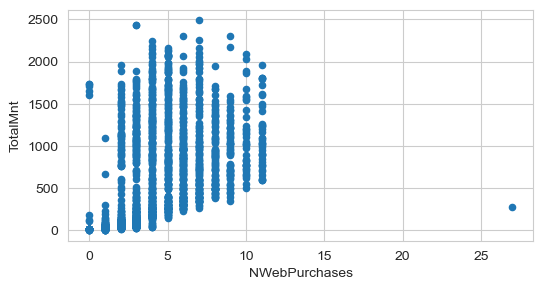

In [20]:
data.plot(x="NWebPurchases", y="TotalMnt", kind="scatter", figsize=(6, 3))

<AxesSubplot:xlabel='PCatalogPurchases', ylabel='TotalMnt'>

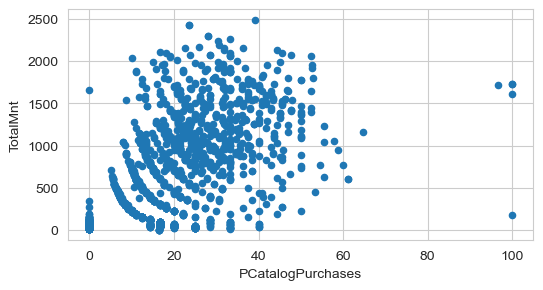

In [21]:
data.plot(x="PCatalogPurchases", y="TotalMnt", kind="scatter", figsize=(6, 3))

<AxesSubplot:xlabel='Income', ylabel='TotalMnt'>

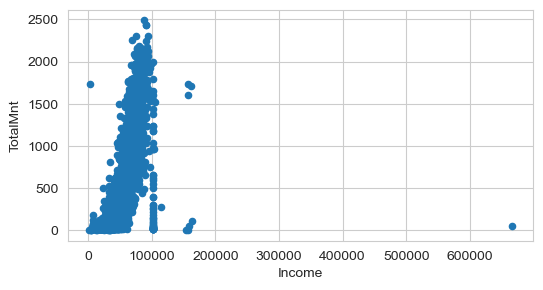

In [22]:
data.plot(x="Income", y="TotalMnt", kind="scatter", figsize=(6, 3))

The first two plotted graphics do not express a significant relation between the features. Hence, those features (the pairs 'TotalMnt and NWebPurchases' and 'TotalMnt and PCatalogPurchases') are not considered to have a relation strong enough to be able to explain each others behaviour and therefore, none of the features will be removed.

However, the third graphic is considered to represent a strong correlation between the features TotalMnt and Income. So, given that the Total Mnt has a higher correlation with the Response variable (the target) than the Income does, the Income variable is discarded in the code bellow.

In [23]:
data = data.drop('Income', axis = 1)

<br>

##### **2.2.3** MntFishProducts, MntFruits and MntSweetProducts

The feature pairs highly correlated, that have to be dealt with, correspond to the 'MntFishProducts and MntFruits' and the 'MntFishProducts and MntSweetProducts'. The matrices that will allow us to acknowledge the importance of each of this features is displayed in the code bellow.

In [24]:
FishProducts = ['MntFishProducts', 'MntFruits', 'MntSweetProducts', 'Response']
display_correlation(FishProducts)

'Spearman:'

,MntFishProducts,MntFruits,MntSweetProducts,Response
MntFishProducts,1.000000,0.708400,0.706352,0.115351
MntFruits,0.708400,1.000000,0.694267,0.150309
MntSweetProducts,0.706352,0.694267,1.000000,0.140114
Response,0.115351,0.150309,0.140114,1.000000


'---------'

'Pearson:'

,MntFishProducts,MntFruits,MntSweetProducts,Response
MntFishProducts,1.000000,0.592738,0.588369,0.105339
MntFruits,0.592738,1.000000,0.566464,0.130971
MntSweetProducts,0.588369,0.566464,1.000000,0.121273
Response,0.105339,0.130971,0.121273,1.000000


<AxesSubplot:xlabel='MntFishProducts', ylabel='MntFruits'>

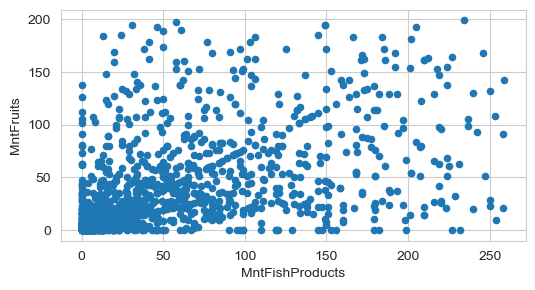

In [25]:
data.plot(x="MntFishProducts", y="MntFruits", kind="scatter", figsize=(6, 3))

<AxesSubplot:xlabel='MntFishProducts', ylabel='MntSweetProducts'>

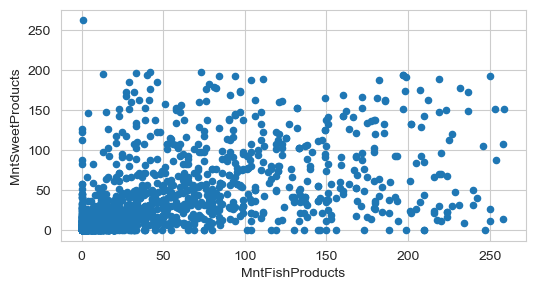

In [26]:
data.plot(x="MntFishProducts", y="MntSweetProducts", kind="scatter", figsize=(6, 3))

The two plotted graphics did not express a significant relation between the features. Thus, those features (the pairs 'MntFishProducts and MntFruits' and 'MntFishProducts and MntSweetProducts') are not considered to have a relation strong enough to be able to explain each others behaviour and therefore, none of the features will be removed.

In [27]:
# Numerical columns' names of the 'data' dataset stored in the 'numerical_columns' array
numerical_columns = data.select_dtypes(include = "number").columns
# Converting the array 'numerical_columns' into a list
numerical_columns = list(numerical_columns)
# Removing the element 'Response' from the list
numerical_columns.remove('Response')

# Computing the correlation matrix, using spearman's coefficient between all the numerical features
plcc = data.loc[:, numerical_columns].corr(method="spearman")
# Displays the correlation matrix
plcc.style.background_gradient(cmap='YlOrRd')

# Reshapes the dataframe by converting the data into a stacked form
plcc_u = plcc.stack()
# Get the upper triangle of the matrix
tri_u = np.triu(np.ones(plcc.shape)).astype('bool').reshape(plcc.size)  
# Select unique pairs
plcc_u = plcc_u[tri_u]  
# Removes the low-correlated pairs and the auto-correlations, given a specified threshold
l_threshold = 0.7
u_threshold = 1
plcc_top = plcc_u[(plcc_u.abs() > l_threshold) & (plcc_u.abs() < u_threshold) & (plcc_u!=1.0)]
# Prints the output
print("Top most correlated feature pairs:\n", plcc_top.abs().sort_values(ascending=False))

Top most correlated feature pairs:
 TotalMnt         NStorePurchases      0.812685
                 NWebPurchases        0.727244
MntFruits        MntFishProducts      0.708400
MntFishProducts  MntSweetProducts     0.706352
TotalMnt         PCatalogPurchases    0.701144
dtype: float64


<br>

### 3. $\chi ^2$ test for independence

The $\chi ^2$ test of independence determines whether there is an association between categorical features. If related, the probability of one variable having a certain value is dependent on the value of the other variable. This is done by taking the frequency of each category and distributing it across the categories of the second variable. The test compares the observed frequencies to the frequencies expected if the two variables are unrelated (similar frequencies if unrelated). The hypotheses are defined as follows:
-  $H_0$: variables are independent;
-  $H_1$: variables are not independent.


To determine whether the variables are independent, the p-value is compared in order of the significance level, usually 0.05. A significance level of 0.05 indicates a 5% risk of concluding that there is an association between the variables when there is none.

- P-value ≤ 0.05: reject the null hypothesis. There is a statistically significant association between the variables. 
- P-value > 0.05: accept the alternative hypothesis, meaning that there is not enough evidence to conclude that the variables are associated.

The $\chi ^2$ test of independence will be computed manually for the categorical values (Education, MaritalStatus and HasChild).

<br>

To automatize the calculation of the $\chi ^2$ for the different features, it is defined the functions ``contigency_table()`` and ``chi_squared()`` in the cells bellow. The first function generates the contingency table for the observed and the expected values, and the second one provides the values of the $\chi ^2$ and respective p-value.


The contigency table for observed and expected values displays actual values (observed values) and the values expected if there was no association between the features (expected values).

In [28]:
def contigency_table(x):
    # defining x and y
    x, y = x, 'Response'
    # Computing the contingency table for observed values
    contigency_table_observed = pd.crosstab(data[x], data[y], margins = True)
    
    # Selects the totals at each row (by selecting the last column, and all the rows exept the last one)
    totals_row = contigency_table_observed.iloc[:-1, -1]
    # Selects the totals at each column (by selecting the last row, and all the columns exept the last one)
    totals_column = contigency_table_observed.iloc[-1, :-1]
    # Selects the total 
    Total = contigency_table_observed.iloc[-1, -1]
    
    # Computes the expected table by multiplying two matrix, and dividing the result by  𝑁 . 
    # The function np.matmul() computes the matrix product of two arrays. 
    # The expected values specify what the values of each cell of the table would be if 
    # there was no association between the two variables.
    counts_expected = np.matmul(totals_row.values[:, None], totals_column.values[None, :], )  # None adds a dimension to an array
    # Divides by N
    counts_expected = counts_expected/Total
    # Copies the observed table and replaces its values 
    contigency_table_expected = contigency_table_observed.copy()
    contigency_table_expected.iloc[:-1, :-1] = counts_expected.astype(int)

    # Gets the result, which is the contingency table for the observed and expected values 
    # (By concatenating the observed contingency table and the expected contingency table)
    result = pd.concat({"Observed": contigency_table_observed.iloc[:, :-1], "Expected": contigency_table_expected}, axis=1)
    # Displaying the resulting table
    display("The observed and expected contingency table:", result)

In [29]:
def chi_squared(x):
    # defining x and y
    x, y = x, 'Response'
    # Computing the contingency table for observed values
    contigency_table_observed = pd.crosstab(data[x], data[y], margins = True)
     
    # Performs the test based on the values of the observed contingency table
    chi2, p_val, _, _ = chi2_contingency(contigency_table_observed.iloc[:-1, :-1].values)   
    # Prints the result
    print("Chi-squared test statistic: {0:.2f}, p-value: {1:.4f}".format(chi2, p_val)) 

<br>

#### **3.1** Education

To visualize the contigency table for observed and expected values of the Education feature it is used the function ``contigency_table()``.

In [30]:
contigency_table('Education')

'The observed and expected contingency table:'

Observed      Expected           
Response          0    1        0    1   All
Education                                   
2n Cycle        163   22      156   28   185
Basic            47    2       41    7    49
Graduation      905  142      888  158  1047
Master          285   54      287   51   339
PhD             352   93      377   67   445
All            1752  313     1752  313  2065

To calculate the $\chi ^2$ of the Education feature it is used the function ``chi_squared()``.

In [31]:
chi_squared('Education')

Chi-squared test statistic: 19.84, p-value: 0.0005


In these results, the chi-square statistic is 19.98 and the p-value = 0.0005. Therefore, at a significance level of 0.05, we can reject the null hypothesis and conclude that the association between the variables is statistically significant (the variables are not indepent).

<br>



#### **3.2** MaritalStatus

To visualize the contigency table for observed and expected values of the MaritalStatus feature it is used the function ``contigency_table()``.

In [32]:
contigency_table('MaritalStatus')

'The observed and expected contingency table:'

Observed      Expected           
Response             0    1        0    1   All
MaritalStatus                                  
Divorced           173   43      183   32   216
Married            708   92      678  121   800
Single             818  159      828  148   977
Widow               53   19       61   10    72
All               1752  313     1752  313  2065

<br>

To calculate the $\chi ^2$ of the Education feature it is used the function ``chi_squared()``.

In [33]:
chi_squared('MaritalStatus')

Chi-squared test statistic: 20.12, p-value: 0.0002


The Chi-squared statistic is 52.46 and the p-value is 0.0000. Thus, with a p-value less than 0.05 we can reject the null hypothesis and conclude that the variable is associated to the taget (Response).

<br>

#### **3.3** HasChild

To visualize the contigency table for observed and expected values of the HasChild feature it is used the function ``contigency_table()``.

In [34]:
contigency_table('HasChild')

'The observed and expected contingency table:'

Observed      Expected           
Response        0    1        0    1   All
HasChild                                  
0             442  161      511   91   603
1            1310  152     1240  221  1462
All          1752  313     1752  313  2065

To calculate the $\chi ^2$ of the MaritalStatus feature it is used the function ``chi_squared()``.

In [35]:
chi_squared('HasChild')

Chi-squared test statistic: 86.97, p-value: 0.0000


The Chi-squared test statistic is 87.19 and the p-value is 0.0000 (less than 0.05), so we can conclude that there is association between HasChild and Response.

<br>
<br>

### 4. Kernel density estimation

A kernel density estimate plot is a method for visualizing the distribution of observations in a dataset. This method represents the data using a continuous probability density curve.

To generate this type of graphic it is created two functions : the ``kernel_density_estimation()`` and the ``kernel_density_estimation_matrix()``.

The ``kernel_density_estimation()`` function generates a single kernel density estimate plot.

In [36]:
# It has as a parameter the feature that will associate with the target
def kernel_density_estimation(x):
    # Define the features
    x, target = x, "Response"
    # Create the graphic
    plt.figure(figsize=(3, 2.5))  # (width, height)
    sns.kdeplot(data=data, x=x, hue=target, multiple="stack", palette=my_palette)
    

The ``kernel_density_estimation_matrix()`` function generates multiple kernel density estimate plots in a matrix with a given amount of rows and columns. This function has three parameters : the list of features it is going to associate with the target, the number of rows and the number of columns of the matrix in which the plots will be displayed.

In [37]:
def kernel_density_estimation_matrix(features_list, n_rows, n_columns):
    # Figure parameters
    fig, ax = plt.subplots(n_rows, n_columns, sharex=True, sharey=False, figsize=(6, 4))
    plt.subplots_adjust(wspace=0.4, hspace=0.1)
    # Features to plot
    x, target = features_list, "Response"
    # Create figure
    ir, ic = 0, 0
    for i, xi in enumerate(x):
        sns.kdeplot(data=data, x=xi, hue=target, multiple="stack", palette=my_palette, ax=ax[ir, ic])
        ic+=1
        if ic%n_columns==0:
            ic = 0
            ir += 1

<br>

#### **4.1** TotalMnt

To understand the distribution of the target values whithin the TotalMnt, we can plot the kernel density estimate, using the function ``kernel_density_estimation()``.

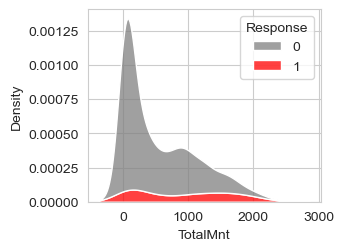

In [38]:
kernel_density_estimation('TotalMnt')

With this representation of the TotalMnt and Response, it is observed that most of the individuals that do not accept the campaign have the least total amount of money spent. It is also observed that the individuals that accept the campaign are associated to the whole range of amount of money spent.

<br>

#### **4.2** HasChild

To understand the distribution of the target values whithin the HasChild, we can plot the kernel density estimate, using the function ``kernel_density_estimation()``.

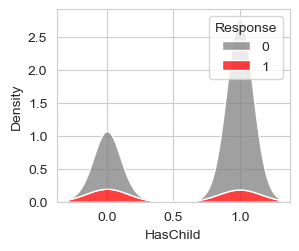

In [39]:
kernel_density_estimation('HasChild')

It is noticeable in the plot above that most of the individuals that do not accept the campaign have children. However, the density of the individuals that accept the campaign is similar for those who have children and for those who do not.

<br>

#### **4.3** Mnt features

To understand the distribution of the target values whithin the Mnt features, we can plot the kernel density estimate, using the function ``kernel_density_estimation_matrix()``.

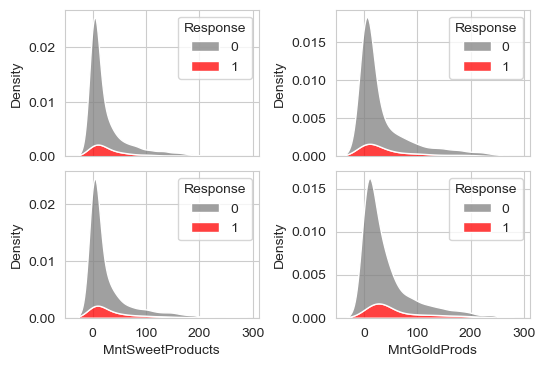

In [40]:
kernel_density_estimation_matrix(['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], 2, 2)

In the plots above, it is observable that all the considered features (Mnt ones) have a similar distribution of the Response values throughout its range. The campaign is primarly not accepted when the amount of money spent in the products considered is low, but is also the most accepted within that values. 

<br>

#### **4.4** Previous Responses

To understand the distribution of the target values whithin the previous Responses, we can plot the kernel density estimate, using the function ``kernel_density_estimation_matrix()``.

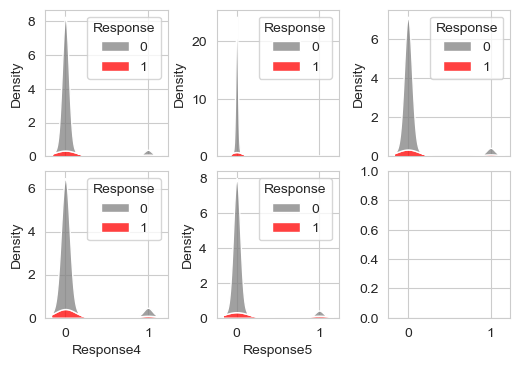

In [41]:
kernel_density_estimation_matrix(['Response1', 'Response2', 'Response3', 'Response4', 'Response5'], 2, 3)

In the kernel density estimation matrix above, we can see that:
* When the value of the previous responses is 0 (the individuals did not accept previous campaigns), most of the current responses are also 0 (those individuals also didn't accept the current campaign). However, it is possible to observe that some of the cases where the previous responses are 0, the current response is 1. 
* When the value of the previous responses is 1 (the individuals accepted previous campaigns), the proportion of the density in comparison to the 0 is so different, that it is only seen some amount of the current responses being 0. 
* The current campaign being 1 (the individuals accepted the current campaign) can only be seen when the previous responses are 0. Therefore, all the previous responses can estimate the individuals that will reject the campaign for the current one significantly well, whereas for the ones that accept, which are more important, it does not have a good estimation.

Thus, this features are considered not to express much importance for the model, and are removed in the code bellow.

In [42]:
data = data.drop(['Response1', 'Response2', 'Response3', 'Response4', 'Response5'], axis = 1)

<br><br>


#### **5.** Brief Overview of the discarded columns

In this stage, it was studied the individual discrimination that each featured presented. Thus, there were some features that were removed from the dataset due to their lack of relevance to the model. In total, fiveteen columns were removed, namely:
* Age;
* NWebVisitsMonth;
* NDealsPurchases;
* PMntGoldProds;
* MntWines;
* MntMeatProducts;
* NCatalogPurchases;
* TotalPurchases;
* Income
* NChildren;
* Response1;
* Response2;
* Response3;
* Response4;
* Response5;


<br>
<br>

### **6.** Exporting the dataset

In order to use this modified dataset in different notebooks, it is necessary to export it. 
The dataset is being exported in an excel format with the name "after_explore1.xlsx". 

In [43]:
data.to_excel("after_explore1.xlsx")